In [9]:
def plot_figures(train_graphs):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.loss)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss')


    plt.subplot(2,5,3)
    plt.semilogy(cur_epochs, train_graphs.eigs)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Sharpness')

    plt.subplot(2,5,4)
    plt.plot(cur_epochs, train_graphs.test_loss)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Testing Loss')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.eigs_test)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Testing Sharpness')

    plt.tight_layout()
    plt.show()

In [7]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, model_name, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, model_name, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, model_name, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"
    return directory

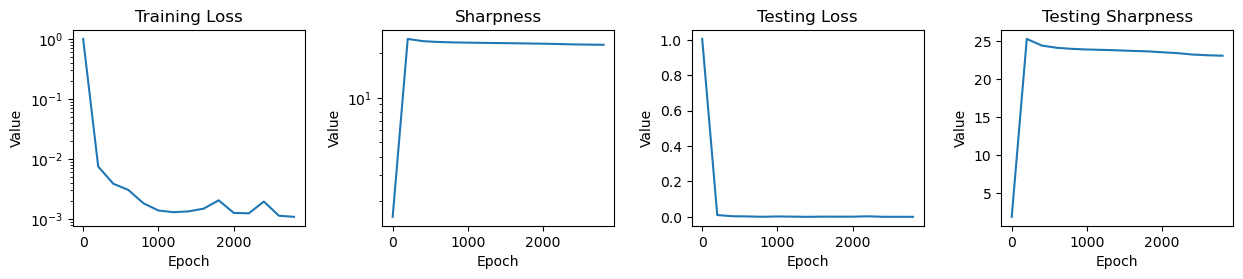

In [10]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "spurious", "sgd", 0, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs)